In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import hvplot.pandas

In [2]:
# Market Index Informations and pull their historical closing price since January 2018
start = "2018-01-01"
sp500 = yf.Ticker("^GSPC")
dows30 = yf.Ticker("^DJI")
nasdaq = yf.Ticker("^IXIC")
sptsx = yf.Ticker("^GSPTSE")
sp500_data = sp500.history(start= start, actions=False)
dows30_data = dows30.history(start = start)
nasdaq_data = nasdaq.history(start= start)
sptsx_data = sptsx.history(start= start)

In [3]:
sp500_data.drop(columns=["Open", "High", "Low", "Volume"], inplace=True)

In [4]:
# Fidelity funds Information and historical closing price since January 2018
fid_us_stocks = yf.Ticker("0P0001364K.TO")
fid_us_stocks_data = fid_us_stocks.history(start = start, actions=False)
fid_us_equity = yf.Ticker("0P000074PP.TO")
fid_us_equity_data = fid_us_equity.history(start = start, actions=False)
# NEI funds ...
nei_us_equity_rs = yf.Ticker("0P000070LH.TO")
nei_us_equity_rs_data = nei_us_equity_rs.history(start = start, actions=False)
# Invesco funds ...
aim_us_companies = yf.Ticker("0P000072U5.TO")
aim_us_companies_data = aim_us_companies.history(start = start, actions=False)
#CIBC funds ...
cibc_us_equity = yf.Ticker("0P000077O0.TO")
cibc_us_equity_data = cibc_us_equity.history(start = start, actions=False)
#RBC funds ...
rbc_us_equity = yf.Ticker("RBCUSEQUITYS.TO")
rbc_us_equity_data = rbc_us_equity.history(start = start, actions=False)
#Scotia funds ...
scotia_us_equity = yf.Ticker("0P000070D4.TO")
scotia_us_equity_data = scotia_us_equity.history(start = start, actions=False)
#BMO funds ...
bmo_us_equity = yf.Ticker("0P00014EDS.TO")
bmo_us_equity_data = bmo_us_equity.history(start = start, actions=False)
#Sunlife Funds
sunlife_us_growth = yf.Ticker("0P00015ILM.TO")
sunlife_us_growth_data = sunlife_us_growth.history(start = start, actions=False)
#Mawer Funds
mawer_us_equity = yf.Ticker("0P0000716B.TO")
mawer_us_equity_data = mawer_us_equity.history(start = start, actions=False)

In [5]:
# Drop extra columns - Open, High, Low, Volume

fid_us_stocks_data.drop(columns=["Open", "High", "Low", "Volume"], inplace=True)
fid_us_equity_data.drop(columns=["Open", "High", "Low", "Volume"], inplace=True)
nei_us_equity_rs_data.drop(columns=["Open", "High", "Low", "Volume"], inplace=True)
aim_us_companies_data.drop(columns=["Open", "High", "Low", "Volume"], inplace=True)
cibc_us_equity_data.drop(columns=["Open", "High", "Low", "Volume"], inplace=True)
rbc_us_equity_data.drop(columns=["Open", "High", "Low", "Volume"], inplace=True)
scotia_us_equity_data.drop(columns=["Open", "High", "Low", "Volume"], inplace=True)
bmo_us_equity_data.drop(columns=["Open", "High", "Low", "Volume"], inplace=True)
sunlife_us_growth_data.drop(columns=["Open", "High", "Low", "Volume"], inplace=True)
mawer_us_equity_data.drop(columns=["Open", "High", "Low", "Volume"], inplace=True)




In [6]:
mawer_us_equity_data.count()

Close    940
dtype: int64

In [7]:
# Combine into single df using concat function -excluding RBC for now - only 16 data points
daily_close_df = pd.concat([fid_us_stocks_data, fid_us_equity_data, nei_us_equity_rs_data, aim_us_companies_data, cibc_us_equity_data, scotia_us_equity_data, bmo_us_equity_data, sunlife_us_growth_data, mawer_us_equity_data, sp500_data], axis="columns", join="inner")

In [8]:
columns = ["FID US Stocks", "FID US Equity", "NEI US Equity RS", "AIM US Companies", "CIBC US Equity", "Scotia US Equity", "BMO US Equity", "Sunlife US Growth", "Mawer US Equity", "S&P500"]
daily_close_df.columns=(columns)


In [9]:
daily_returns = daily_close_df.pct_change()
daily_returns = daily_returns.dropna()
daily_returns

FID US Stocks  FID US Equity  NEI US Equity RS  AIM US Companies  \
Date                                                                           
2018-01-03       0.011615       0.007338          0.007122          0.010438   
2018-01-04       0.007428       0.001941          0.002840          0.001109   
2018-01-05       0.015560      -0.000520          0.001880         -0.001247   
2018-01-08       0.003022       0.005053          0.001745          0.001387   
2018-01-09       0.002904       0.004560          0.003358          0.010317   
...                   ...            ...               ...               ...   
2021-09-22       0.013356       0.004097          0.002390          0.008696   
2021-09-23       0.014158      -0.002485          0.000838          0.005371   
2021-09-24      -0.000454       0.001568          0.000712          0.000375   
2021-09-27      -0.006965      -0.012471         -0.007017         -0.007729   
2021-09-29      -0.037179      -0.001724         -0.004579         -0.026482   

            CIBC US Equity  Scotia US Equity  BMO US Equity  \
Date                                                          
2018-01-03        0.010296          0.008984       0.008046   
2018-01-04       -0.000562          0.001228       0.003287   
2018-01-05        0.003267         -0.000176      -0.000596   
2018-01-08        0.002338          0.002937      -0.000112   
2018-01-09        0.007281          0.004431       0.004599   
...                    ...               ...            ...   
2021-09-22        0.004507          0.005132       0.007602   
2021-09-23        0.005334          0.003554       0.004545   
2021-09-24        0.002315          0.001521       0.001686   
2021-09-27       -0.008829         -0.006200      -0.003258   
2021-09-29       -0.010294         -0.010602      -0.011572   

            Sunlife US Growth  Mawer US Equity    S&P500  
Date                                                      
2018-01-03           0.013065         0.009637  0.006399  
2018-01-04           0.002525         0.005464  0.004029  
2018-01-05          -0.000058        -0.002476  0.007034  
2018-01-08           0.005075         0.004642  0.001662  
2018-01-09           0.006273         0.007178  0.001303  
...                       ...              ...       ...  
2021-09-22           0.001914         0.002699  0.009520  
2021-09-23           0.003210         0.003395  0.012135  
2021-09-24           0.004681         0.004715  0.001461  
2021-09-27          -0.017305        -0.013631 -0.002776  
2021-09-29          -0.023922        -0.010689 -0.018827  

[833 rows x 10 columns]

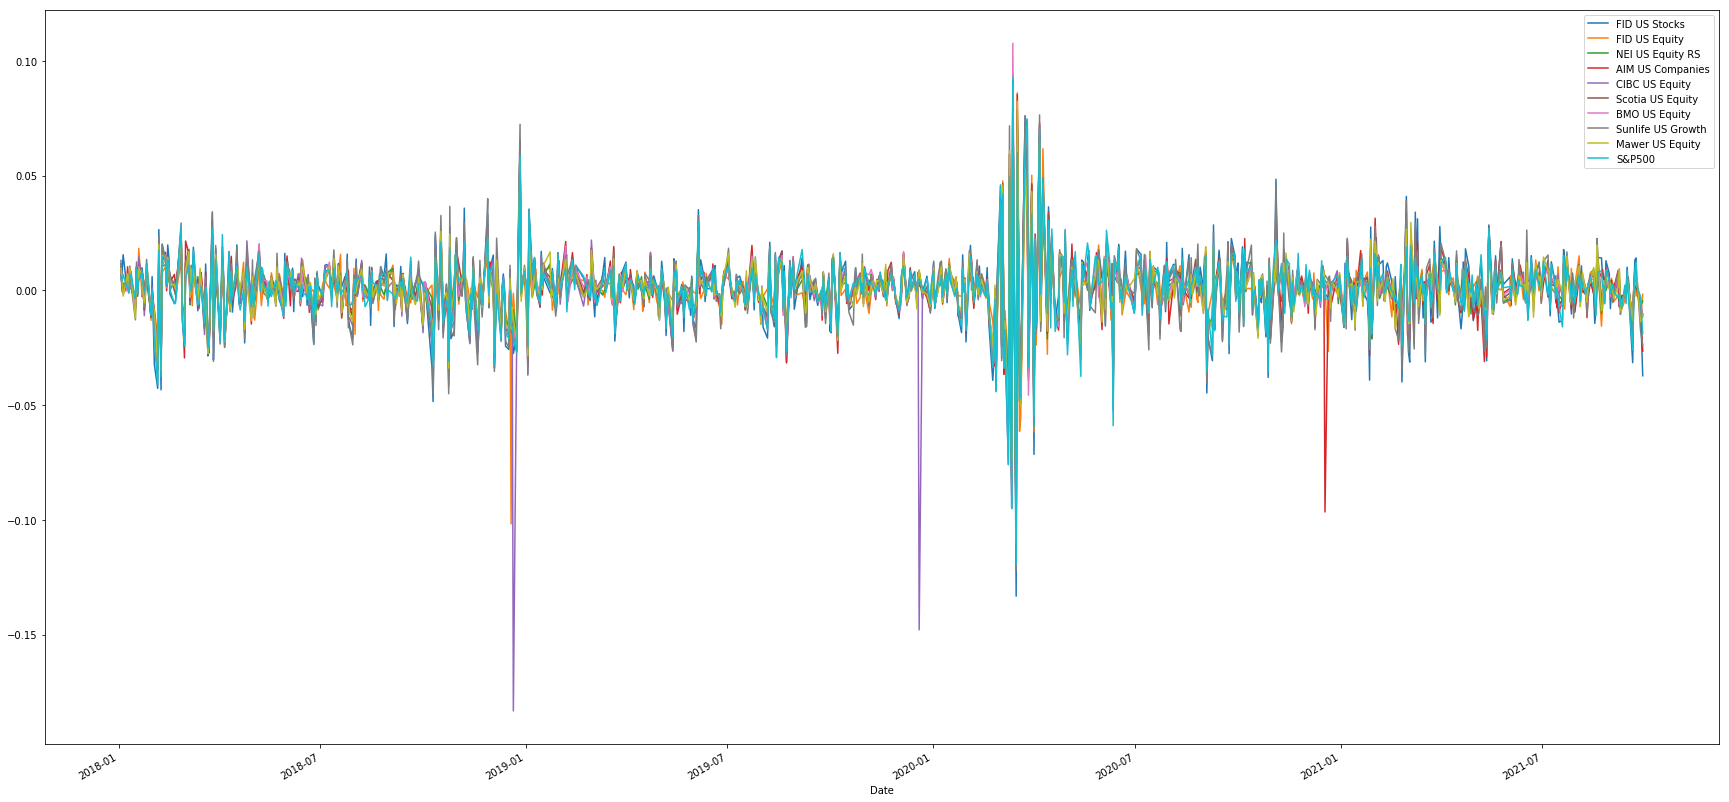

In [10]:
daily_returns.plot(figsize=(30,15))


In [11]:
growth_10k = (1 + daily_returns) * 10000


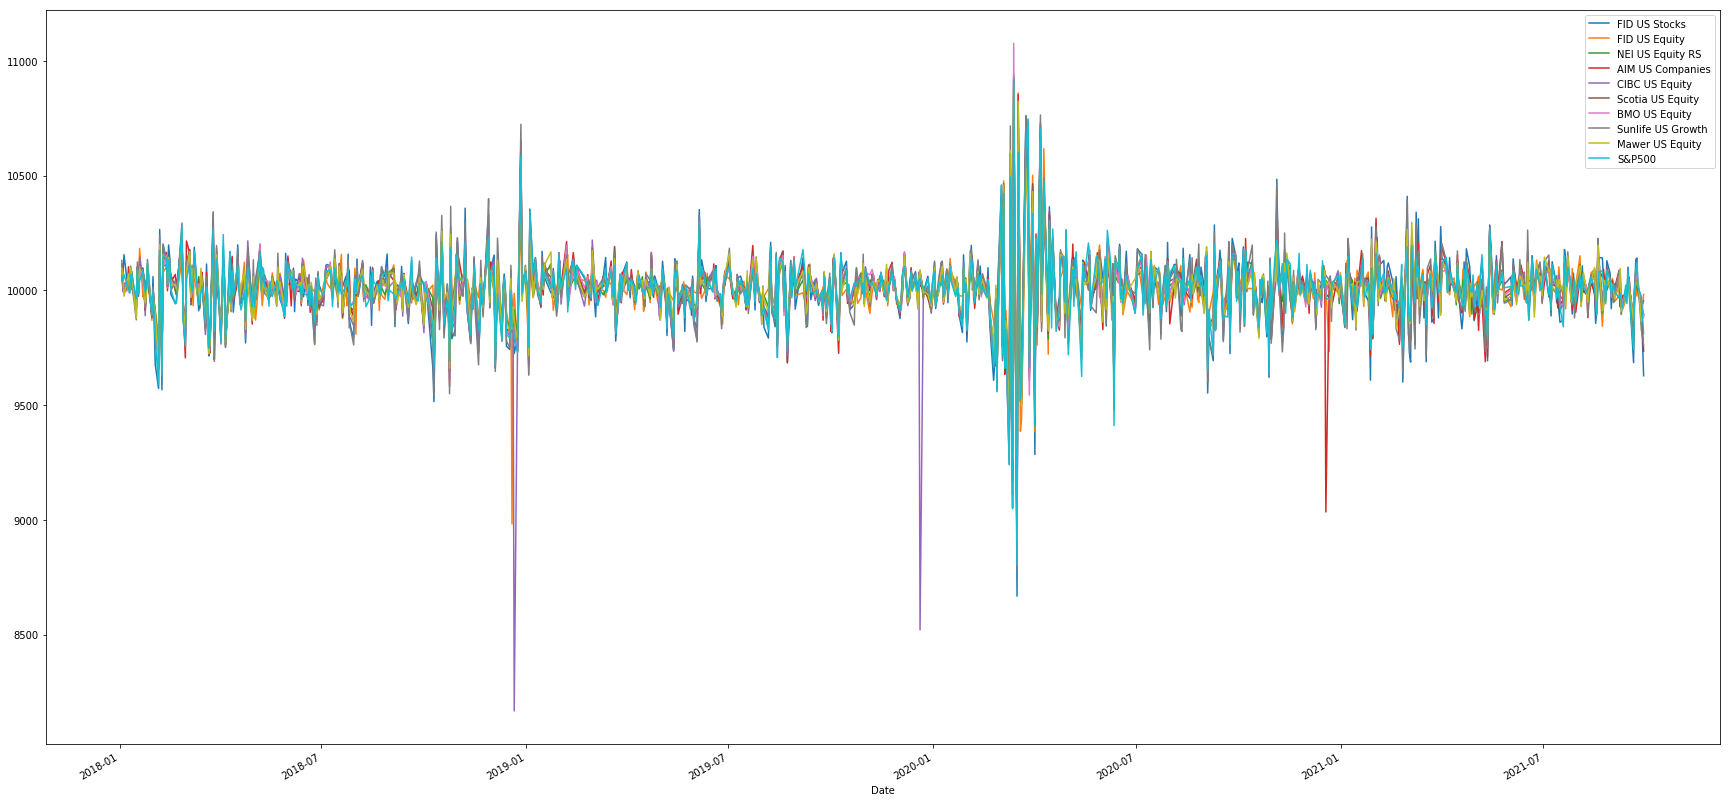

In [12]:
growth_10k.plot(figsize=(30,15))

In [13]:
cumulative_return = (1+ daily_returns).cumprod()-1

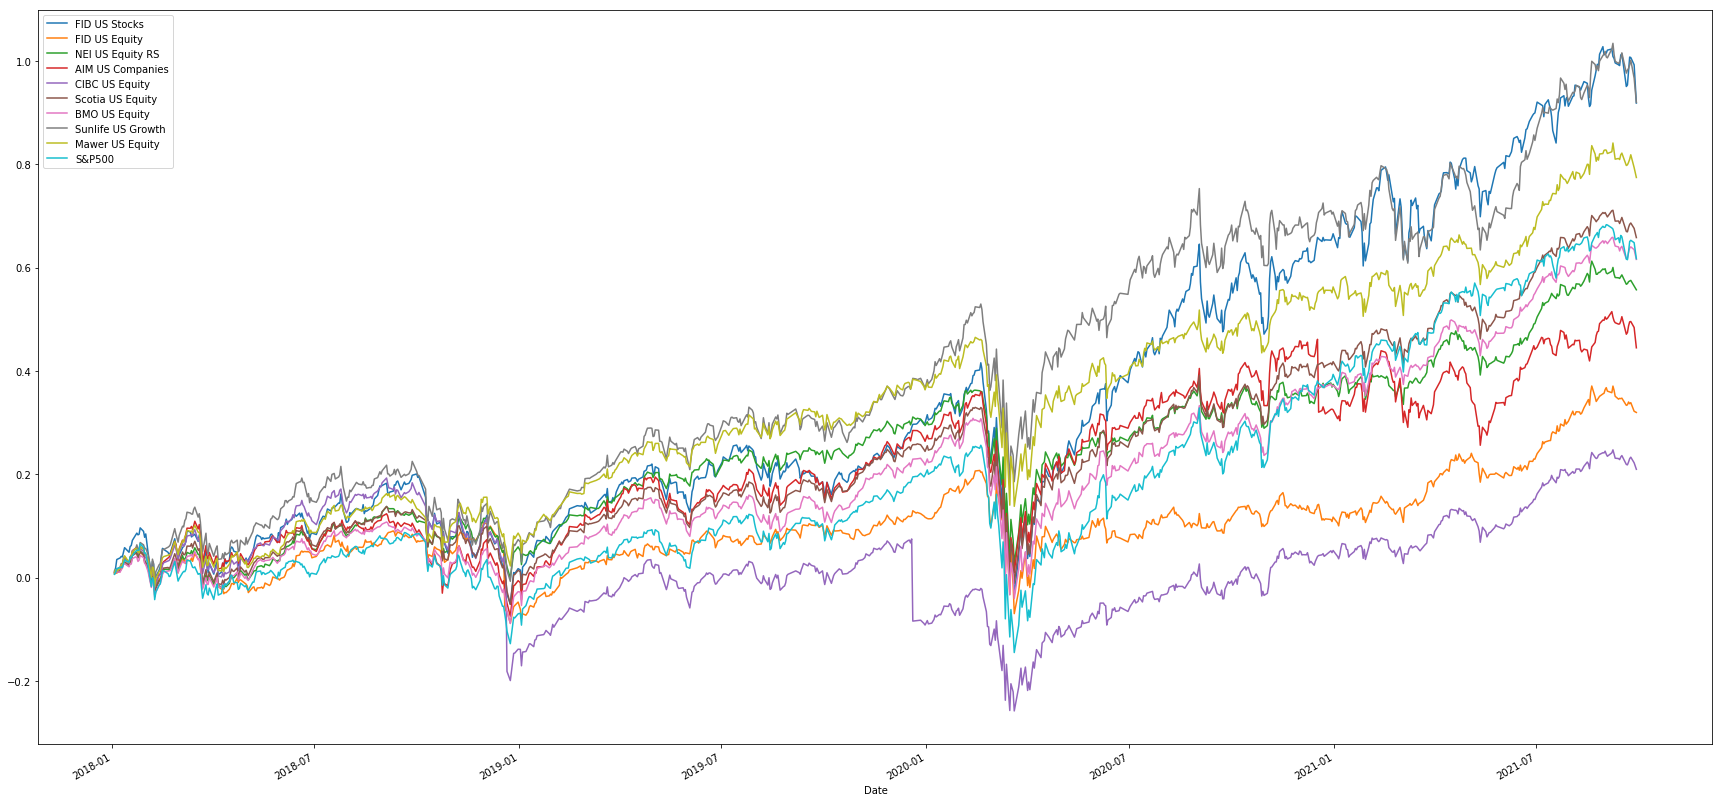

In [14]:
cumulative_return.plot(figsize = (30,15))

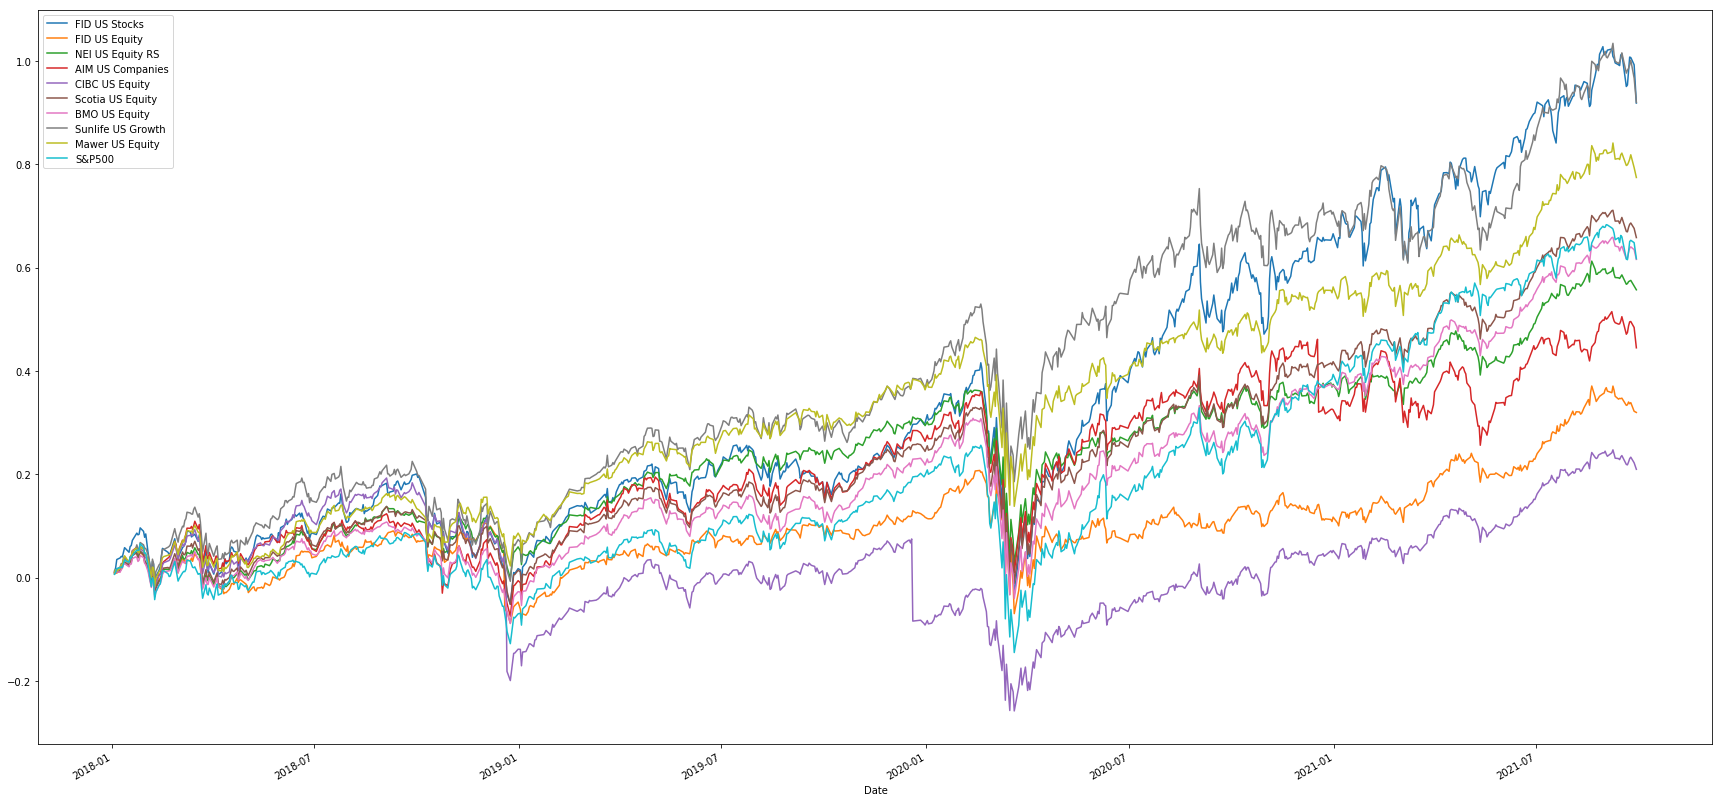

In [18]:
fig = cumulative_return.plot(figsize = (30,15))
fig.get_figure().savefig("Figure")

In [15]:
daily_returns.hvplot()

:NdOverlay   [Variable]
   :Curve   [Date]   (value)